In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import numpy as np
from fractions import Fraction
from itertools import product

In [35]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [36]:
def Calkin_Wilf():
    x = Fraction(1, 1)
    yield x
    while True:
        x = Fraction(1, 2*Fraction(int(x))-x+1)
        yield x

In [37]:
rationals = []

rational = Calkin_Wilf()
for _ in range(60):
    rationals.append(float(next(rational)))

In [38]:
rationals.append(0)

In [39]:
def check_rational(value, tol):
    test = []
    for rational in rationals:
        if abs(abs(value) - rational)<tol:
            test.append(1)
        else:
            test.append(0)
    if 1 in test:
        return 1
    else:
        return 0

In [27]:
def check(value, tol, int_max):
    integers = np.arange(0, int_max+1, 1)
    test = []
    for integer in integers:
        if abs(abs(value) - integer)<tol:
            test.append(1)
        else:
            test.append(0)
    if 1 in test:
        return 1
    else:
        return 0

In [64]:
A_min = -4.0;
A_max = 4.0;
A_step = 0.1;

B_min = -4.0;
B_max = 4.0;
B_step = 0.1;

A_values = np.arange(A_min, A_max+A_step, A_step);
B_values = np.arange(B_min, B_max+B_step, B_step);

#A_values = A_values[:-1]

In [65]:
A_labels = np.arange(A_min, A_max+50*A_step, 50*A_step)
B_labels = np.arange(B_min, B_max+50*B_step, 50*B_step)

In [66]:
B_grid, A_grid = np.meshgrid(B_values, A_values)

In [73]:
test = pd.read_csv("test_monodromyTr.csv", header=None)
test = test.to_numpy()
test = np.transpose(test)

In [74]:
test[np.abs(test)>2] = 1
#test[np.abs(test)<2] = 0

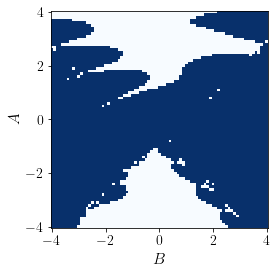

In [75]:
#plt.title(r"$\epsilon=0.05$", fontsize=16)
plt.pcolormesh(A_grid, B_grid, test, cmap="Blues", rasterized=True)
#plt.plot(B_values, sqrt_B_curve)
#plt.pcolormesh(B_grid, A_grid, ph_lock_areas, cmap="Blues", rasterized=True)
plt.gca().set_aspect(1.0)
plt.tick_params(axis='both', which='both', labelsize=14,
    left=True,
    bottom=True,
    top=False,
    labelleft=True,
    labelbottom=True)
plt.xlabel(r'$B$', fontsize=16)
plt.ylabel(r'$A$', fontsize=16)
#plt.savefig('ph_Lyaps.png', bbox_inches='tight', dpi = 1200)
plt.show()